In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [100]:
# Read in the diamonds dataframe
diamonds = pd.read_csv("./data/diamonds.csv")
diamonds

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53935,53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,53939,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [101]:
# Delete the 'Unnamed: 0' column
diamonds = diamonds.drop("Unnamed: 0", axis=1)
diamonds.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

## Visualize data

In [102]:
# Checking types of data columns
diamonds.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

In [103]:
# Transform "table" column into int64 type beacuse it doesn't have decimals
diamonds['table'] = tf.cast(diamonds['table'], dtype=tf.int64)
diamonds['table'].dtype

dtype('int64')

In [104]:
# Getting numerical columns and categorical columns
num_cols = diamonds.select_dtypes(include=['float64', 'int64']) #[col for col in diamonds.columns if diamonds[col].dtype in ('float64', 'int64')]
cat_cols = diamonds.drop(num_cols, axis=1)

num_cols, cat_cols

(       carat  depth  table  price     x     y     z
 0       0.23   61.5     55    326  3.95  3.98  2.43
 1       0.21   59.8     61    326  3.89  3.84  2.31
 2       0.23   56.9     65    327  4.05  4.07  2.31
 3       0.29   62.4     58    334  4.20  4.23  2.63
 4       0.31   63.3     58    335  4.34  4.35  2.75
 ...      ...    ...    ...    ...   ...   ...   ...
 53935   0.72   60.8     57   2757  5.75  5.76  3.50
 53936   0.72   63.1     55   2757  5.69  5.75  3.61
 53937   0.70   62.8     60   2757  5.66  5.68  3.56
 53938   0.86   61.0     58   2757  6.15  6.12  3.74
 53939   0.75   62.2     55   2757  5.83  5.87  3.64
 
 [53940 rows x 7 columns],
              cut color clarity
 0          Ideal     E     SI2
 1        Premium     E     SI1
 2           Good     E     VS1
 3        Premium     I     VS2
 4           Good     J     SI2
 ...          ...   ...     ...
 53935      Ideal     D     SI1
 53936       Good     D     SI1
 53937  Very Good     D     SI1
 53938    Premi

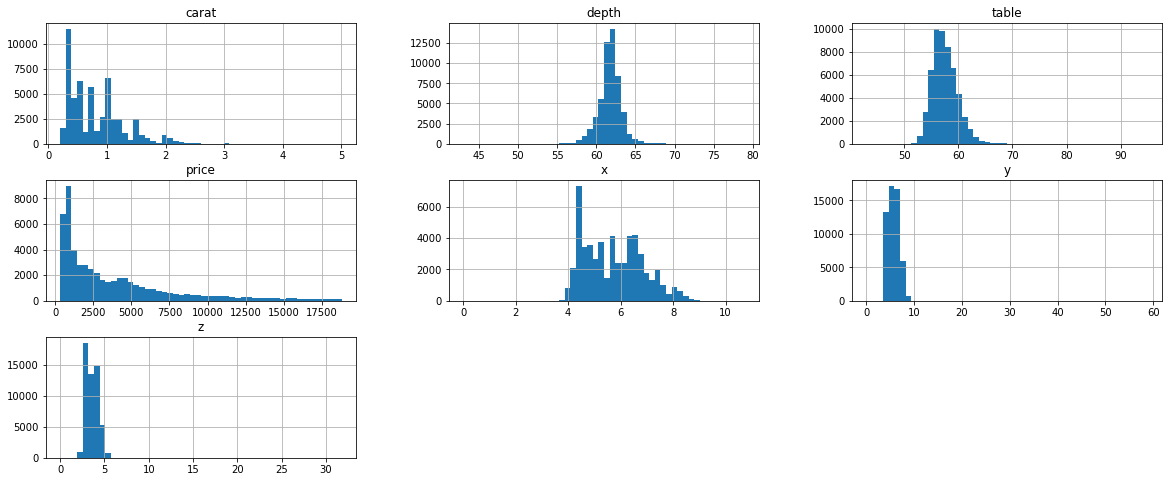

In [105]:
# Visualizing numerical distribution
num_cols.hist(figsize=(20,8), bins=50);

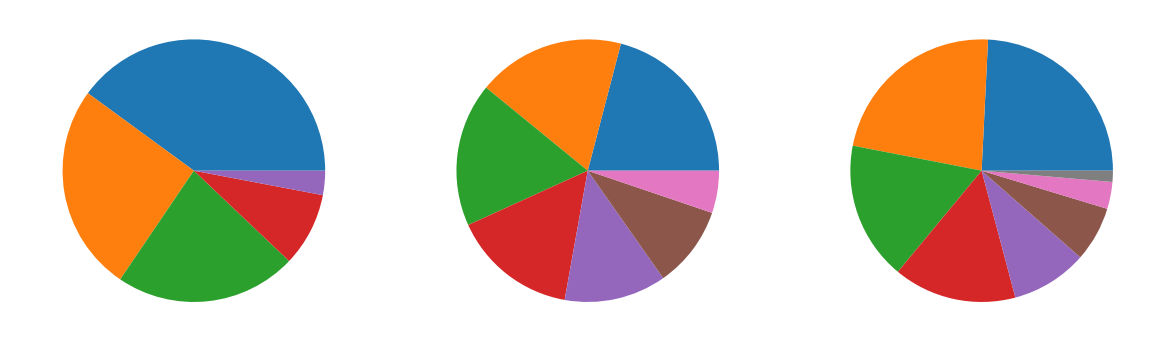

In [106]:
# Visualizing categorical distribution
figure, axes = plt.subplots(nrows=1,ncols=3, figsize=(20,7))


for i, col in enumerate(cat_cols):
    axes[i].pie(cat_cols[col].value_counts().values, labels=cat_cols[col].value_counts().axes[0].tolist(), textprops=dict(color='white'));
plt.show()

In [107]:
# TODO: make graphics comparing variables with the target one

# TODO: make a correlation matrix

## Preprocesing data

- OneHot Encoder (categorical columns)
- Normalization (numerical columns)


In [108]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

# Define column transformer with OneHotEncoder
ct = make_column_transformer(
    (MinMaxScaler(), num_cols.loc[:, num_cols.columns != "price"].columns),
    (OneHotEncoder(handle_unknown="ignore"), cat_cols.columns)
)

# Create X and y
X = diamonds.drop("price", axis=1)
y = diamonds["price"]

# Build train test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to training data
ct.fit(X_train)

# Transform training and test data
X_train_encoder = ct.transform(X_train)
X_test_encoder = ct.transform(X_test)


In [109]:
X_train.iloc[0,:]

carat      2.01
cut        Good
color         F
clarity     SI2
depth      58.1
table        64
x          8.23
y          8.19
z          4.77
Name: 26546, dtype: object

In [110]:
X_train_encoder[0]

array([0.37629938, 0.41944444, 0.40384615, 0.76629423, 0.13904924,
       0.15      , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 1.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        ])

In [111]:
# Convert array into a tensor
X_train_encoder = tf.convert_to_tensor(X_train_encoder)
X_test_encoder = tf.convert_to_tensor(X_test_encoder)

In [112]:
X_train_encoder, X_test_encoder

(<tf.Tensor: shape=(43152, 26), dtype=float64, numpy=
 array([[0.37629938, 0.41944444, 0.40384615, ..., 0.        , 0.        ,
         0.        ],
        [0.16839917, 0.47222222, 0.32692308, ..., 0.        , 0.        ,
         0.        ],
        [0.18711019, 0.54166667, 0.28846154, ..., 1.        , 0.        ,
         0.        ],
        ...,
        [0.02702703, 0.48055556, 0.28846154, ..., 0.        , 0.        ,
         0.        ],
        [0.14553015, 0.55      , 0.30769231, ..., 0.        , 0.        ,
         0.        ],
        [0.1954262 , 0.48333333, 0.28846154, ..., 0.        , 0.        ,
         0.        ]])>,
 <tf.Tensor: shape=(10788, 26), dtype=float64, numpy=
 array([[0.00831601, 0.53055556, 0.25      , ..., 0.        , 1.        ,
         0.        ],
        [0.07900208, 0.47222222, 0.26923077, ..., 0.        , 0.        ,
         1.        ],
        [0.04158004, 0.53055556, 0.23076923, ..., 0.        , 0.        ,
         1.        ],
        ...,

In [113]:
# Checking shapes
X_train_encoder.shape, X_train.shape

(TensorShape([43152, 26]), (43152, 9))

## Creating a model

In [186]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(35, input_shape=(26,)),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(learning_rate=0.01),
                metrics=['mae'])

In [187]:
# checking model structure
model.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 35)                945       
_________________________________________________________________
dense_60 (Dense)             (None, 25)                900       
_________________________________________________________________
dense_61 (Dense)             (None, 1)                 26        
Total params: 1,871
Trainable params: 1,871
Non-trainable params: 0
_________________________________________________________________


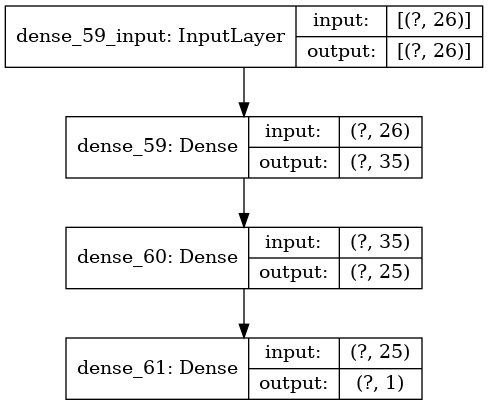

In [188]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True)

In [189]:
history = model.fit(X_train_encoder, y_train, epochs=50)

Epoch 1/50
1349/1349 [==============================] - 1s 385us/step - loss: 1513.4517 - mae: 1513.4517
Epoch 2/50
1349/1349 [==============================] - 1s 386us/step - loss: 1034.2123 - mae: 1034.2123
Epoch 3/50
1349/1349 [==============================] - 1s 395us/step - loss: 981.4573 - mae: 981.4573
Epoch 4/50
1349/1349 [==============================] - 1s 395us/step - loss: 972.2936 - mae: 972.2936
Epoch 5/50
1349/1349 [==============================] - 1s 390us/step - loss: 954.1505 - mae: 954.1505
Epoch 6/50
1349/1349 [==============================] - 1s 394us/step - loss: 950.9573 - mae: 950.9573
Epoch 7/50
1349/1349 [==============================] - 1s 394us/step - loss: 917.0427 - mae: 917.0427
Epoch 8/50
1349/1349 [==============================] - 1s 391us/step - loss: 928.1878 - mae: 928.1878
Epoch 9/50
1349/1349 [==============================] - 1s 395us/step - loss: 908.2118 - mae: 908.2118
Epoch 10/50
1349/1349 [==============================] - 1s 386us/ste

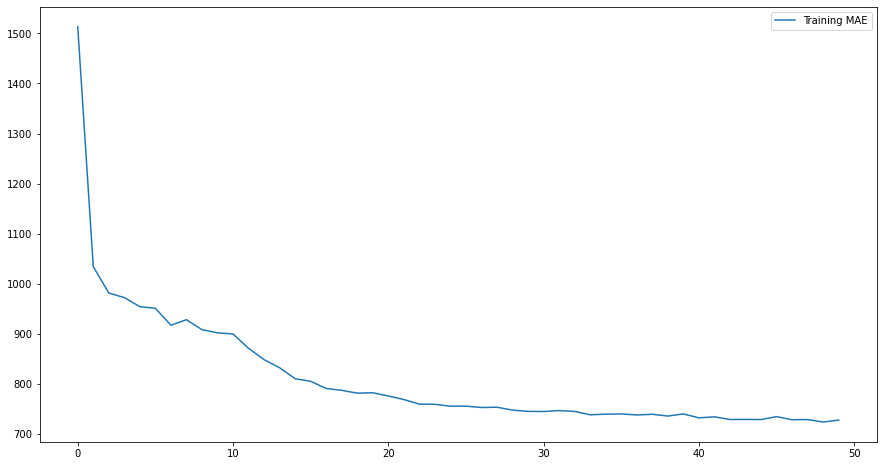

In [190]:
history_df = pd.DataFrame(history.history)
history_df['epoch'] = history.epoch

fig, ax = plt.subplots(1, figsize=(15,8))
num_epochs = history_df.shape[0]

ax.plot(np.arange(0, num_epochs), history_df['mae'], label='Training MAE')
ax.legend()

plt.show()

In [191]:
# Get predicitons with test data
y_preds = model.predict(X_test_encoder)

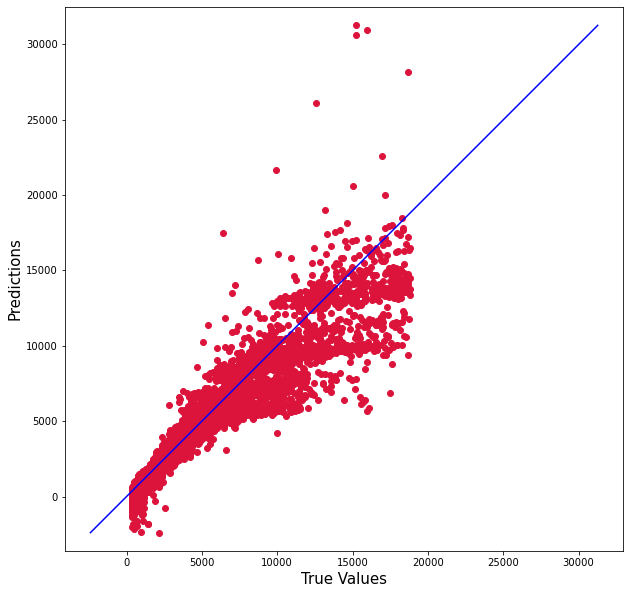

In [192]:
# Plot true labels vs predicitons

plt.figure(figsize=(10,10))
plt.scatter(y_test, y_preds, c='crimson')

p1 = max(max(y_preds), max(y_test))
p2 = min(min(y_preds), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

## Evaluate model

In [193]:
# Calculate mae
model.evaluate(X_test_encoder, y_test)

338/338 [==============================] - 0s 356us/step - loss: 665.8269 - mae: 665.8269


[665.826904296875, 665.826904296875]

In [194]:
# Calculate mse
tf.metrics.mean_squared_error(y_test, y_preds.squeeze())

<tf.Tensor: shape=(), dtype=float32, numpy=1655279.5>